<a href="https://colab.research.google.com/github/kkningoo/ML-Model-for-drug-discovery/blob/main/Alchemix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip3  install rdkit

import numpy as np
import rdkit
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 37.7 MB/s eta 0:00:00


In [ ]:
from google.colab import files
data=files.upload()

Saving hdac6.csv to hdac6.csv


In [ ]:
df = pd.read_csv('hdac6.csv',on_bad_lines='skip',sep=';')

In [ ]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL253309,NaN,NaN,563.79,1.0,3.30,"3, cyclo(-L-Am7(S2Py)-Aib-L-Leu-D-Pro-)",CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1140755,1,Scientific Literature,Bioorg Med Chem,2008,NaN,NaN,NaN,NaN
1,CHEMBL269935,NaN,NaN,289.33,0.0,4.31,2,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
2,CHEMBL437029,NaN,NaN,521.62,2.0,5.43,56,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
3,CHEMBL3639926,NaN,NaN,411.55,0.0,4.88,BDBM110013,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN
4,CHEMBL3693779,NaN,NaN,496.55,1.0,5.09,BDBM110029,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN


In [ ]:
filter_df = df[[ 'Smiles', 'Standard Type', 'Standard Value']]
filter_df

,Smiles,Standard Type,Standard Value
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,230.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,50000.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,50000.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,35.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,13.0
...,...,...,...
6483,O=C(CCCCCCC(=O)Nc1ccccc1)NO,IC50,33.0
6484,O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO,IC50,4.7
6485,CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,IC50,21800.0
6486,Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...,IC50,180.0


In [ ]:
def norm_value(input):
    norm = []

    for i in input['Standard Value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop(columns=['Standard Value'])
    return(x)

standard_df = norm_value(filter_df)
standard_df

<ipython-input-8-972134cf7d77>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['standard_value_norm'] = norm


,Smiles,Standard Type,standard_value_norm
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,230.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,50000.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,50000.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,35.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,13.0
...,...,...,...
6483,O=C(CCCCCCC(=O)Nc1ccccc1)NO,IC50,33.0
6484,O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO,IC50,4.7
6485,CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,IC50,21800.0
6486,Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...,IC50,180.0


In [ ]:
# now defining the pIC50 function : converting IC50 to pIC50
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(columns='standard_value_norm')

    return x

In [ ]:
df_pIC50 = pIC50(standard_df)
df_pIC50

,Smiles,Standard Type,pIC50
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,6.638272
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,4.301030
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,4.301030
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,7.455932
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,7.886057
...,...,...,...
6483,O=C(CCCCCCC(=O)Nc1ccccc1)NO,IC50,7.481486
6484,O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO,IC50,8.327902
6485,CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,IC50,4.661544
6486,Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...,IC50,6.744727


In [ ]:
cleaned_df = df_pIC50.dropna()
cleaned_df

,Smiles,Standard Type,pIC50
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,6.638272
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,4.301030
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,4.301030
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,7.455932
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,7.886057
...,...,...,...
6483,O=C(CCCCCCC(=O)Nc1ccccc1)NO,IC50,7.481486
6484,O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO,IC50,8.327902
6485,CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,IC50,4.661544
6486,Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...,IC50,6.744727


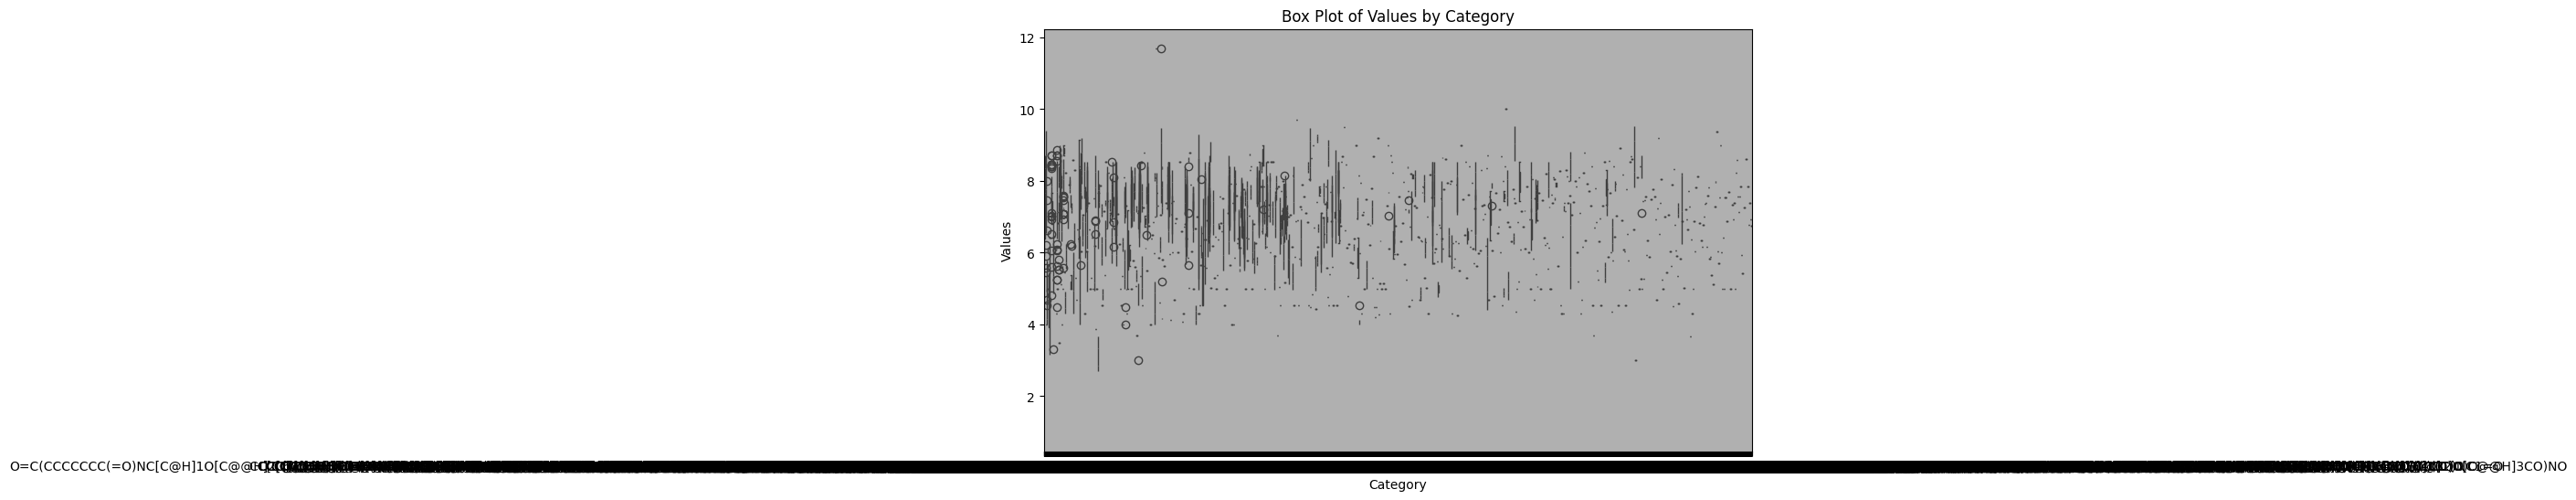

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Smiles', y='pIC50', data=cleaned_df,whis=1.5)
plt.title('Box Plot of Values by Category')
plt.xlabel('Category')
plt.ylabel('Values')
plt.grid(True)
plt.show()


In [ ]:
cleaned_df['pIC50'].max()

11.698970004336019

In [ ]:
cleaned_df['pIC50'].min()

1.0

In [ ]:
bioactivity_threshold=[]

for i in cleaned_df.pIC50:

  if float(i) >= 7:
      bioactivity_threshold.append("Rank I")
  elif float(i) >= 5:
      bioactivity_threshold.append("Rank II")
  else:
      bioactivity_threshold.append("Rank III")

In [ ]:
len(bioactivity_threshold)

6291

In [ ]:
count_r1=0
for ele in bioactivity_threshold:
  if ele=="Rank I":count_r1+=1

print(count_r1)


2968


In [ ]:
final_df=cleaned_df.copy()

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='bioactivity_class')
len(bioactivity_class)

6291

In [ ]:
final_df = pd.concat([cleaned_df, bioactivity_class], axis=1)
final_df

,Smiles,Standard Type,pIC50,bioactivity_class
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,6.638272,Rank II
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,4.301030,Rank III
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,4.301030,Rank III
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,7.455932,Rank I
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,7.886057,Rank I
...,...,...,...,...
6203,NaN,NaN,NaN,Rank III
6206,NaN,NaN,NaN,Rank I
6237,NaN,NaN,NaN,Rank I
6238,NaN,NaN,NaN,Rank I


In [ ]:
final_df.dropna()

,Smiles,Standard Type,pIC50,bioactivity_class
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,6.638272,Rank II
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,4.301030,Rank III
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,4.301030,Rank III
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,7.455932,Rank I
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,7.886057,Rank I
...,...,...,...,...
6286,COc1ccc(-c2ccccc2)c2c1CCN(Cc1ccc(C(=O)NO)cc1)CC2,IC50,6.303644,Rank I
6287,COc1cc(C(=O)NO)ccc1CN(C(C)C)S(=O)(=O)c1cc(F)c(...,IC50,6.000000,Rank I
6288,O=C1CN(Cc2ccc(C(=O)NO)cc2)C(=O)[C@H](Cc2c[nH]c...,IC50,8.177832,Rank III
6289,O=C(NO)c1ccc(CNC(=O)c2c(F)c(F)c(F)c(F)c2F)cc1,IC50,8.227678,Rank II


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

In [ ]:
descriptor_names = [desc_name[0] for desc_name in Descriptors._descList] #208, list exists in rdkit, wol wt


calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)


def calculate_descriptors(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles) # converting smiles to "molecular object"
        if mol is not None:
            return calculator.CalcDescriptors(mol)
        else:
            return [None] * len(descriptor_names)
    except:
        return [None] * len(descriptor_names)


descriptors = cleaned_df['Smiles'].apply(calculate_descriptors) # calculating descriptors for all smiles in our original dataframe
desc = pd.DataFrame(descriptors.tolist(), columns=descriptor_names) # Adding these descriptors as lists to a new data frame, whose column heading is the descriptor name
results_df = pd.concat([final_df, desc], axis=1) # make a final data frame


Streaming output truncated to the last 5000 lines.
[09:42:00] DEPRECATION WARNING: please use MorganGenerator
[09:42:00] DEPRECATION WARNING: please use MorganGenerator
[09:42:00] DEPRECATION WARNING: please use MorganGenerator
[09:42:00] DEPRECATION WARNING: please use MorganGenerator
[09:42:00] DEPRECATION WARNING: please use MorganGenerator
[09:42:00] DEPRECATION WARNING: please use MorganGenerator
[09:42:00] DEPRECATION WARNING: please use MorganGenerator
[09:42:00] DEPRECATION WARNING: please use MorganGenerator
[09:42:00] DEPRECATION WARNING: please use MorganGenerator
[09:42:00] DEPRECATION WARNING: please use MorganGenerator
[09:42:00] DEPRECATION WARNING: please use MorganGenerator
[09:42:00] DEPRECATION WARNING: please use MorganGenerator
[09:42:00] DEPRECATION WARNING: please use MorganGenerator
[09:42:00] DEPRECATION WARNING: please use MorganGenerator
[09:42:00] DEPRECATION WARNING: please use MorganGenerator
[09:42:00] DEPRECATION WARNING: please use MorganGenerator
[09:4

In [ ]:
cleaned_final = results_df.dropna()
print(f"Original DataFrame shape: {results_df.shape}")
print(f"Cleaned DataFrame shape: {cleaned_final.shape}")

Original DataFrame shape: (6483, 214)
Cleaned DataFrame shape: (6080, 214)


In [ ]:
cleaned_final.head()

,Smiles,Standard Type,pIC50,bioactivity_class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,6.638272,Rank II,13.450481,13.450481,0.167702,-1.237584,0.295108,24.236842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,4.301030,Rank III,12.191887,12.191887,0.045335,-0.248971,0.705740,10.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,4.301030,Rank III,12.957424,12.957424,0.049385,-0.317974,0.328284,15.051282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,7.455932,Rank I,12.632866,12.632866,0.003616,-0.353767,0.295518,10.566667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,7.886057,Rank I,13.653820,13.653820,0.215010,-1.135580,0.141117,11.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [ ]:
c=0
check=cleaned_final['bioactivity_class']
for ele in check:
  if ele=='Rank II': c+=1

print(c)

2522


In [ ]:
from sklearn.preprocessing import RobustScaler # robust to outliers
df_robust = cleaned_final.copy()

# numeric columns excluding 'FDA_APPROVED'
numeric_columns = df_robust.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col != 'pIC50'] # dont scale y!

scaler = RobustScaler()

# scale selected numeric columns
df_robust[numeric_columns] = scaler.fit_transform(df_robust[numeric_columns])

print(df_robust.head())



                                              Smiles Standard Type     pIC50  \
0  CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...          IC50  6.638272   
1                 O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1          IC50  4.301030   
2  C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...          IC50  4.301030   
3  Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...          IC50  7.455932   
4  COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...          IC50  7.886057   

  bioactivity_class  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
0           Rank II           0.651798        0.651798           0.287258   
1          Rank III          -0.154388       -0.154388          -0.424996   
2          Rank III           0.335973        0.335973          -0.401428   
3            Rank I           0.128078        0.128078          -0.667830   
4            Rank I           0.782045        0.782045           0.562620   

   MinEStateIndex       qed       SPS  ...  fr_sulfide  

In [ ]:
y = df_robust['bioactivity_class']
X = df_robust.drop(columns=['pIC50', 'Smiles',  'Standard Type','bioactivity_class'])

In [ ]:
print(y)
print()
print(X.head())

0        Rank II
1       Rank III
2       Rank III
3         Rank I
4         Rank I
          ...   
6286      Rank I
6287      Rank I
6288    Rank III
6289     Rank II
6290    Rank III
Name: bioactivity_class, Length: 6080, dtype: object

   MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0           0.651798        0.651798           0.287258       -1.767172   
1          -0.154388       -0.154388          -0.424996        0.785755   
2           0.335973        0.335973          -0.401428        0.607566   
3           0.128078        0.128078          -0.667830        0.515137   
4           0.782045        0.782045           0.562620       -1.503764   

        qed       SPS     MolWt  HeavyAtomMolWt  ExactMolWt  \
0 -0.236001  2.926091  1.144912        1.099534    1.144113   
1  1.145542 -0.321431 -0.744942       -0.742953   -0.745048   
2 -0.124381  0.803696  0.854544        0.861371    0.854572   
3 -0.234620 -0.232509  0.096587        0.029436    0.096

In [ ]:
X.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.651798,0.651798,0.287258,-1.767172,-0.236001,2.926091,1.144912,1.099534,1.144113,1.107143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.154388,-0.154388,-0.424996,0.785755,1.145542,-0.321431,-0.744942,-0.742953,-0.745048,-0.714286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.335973,0.335973,-0.401428,0.607566,-0.124381,0.803696,0.854544,0.861371,0.854572,0.892857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.128078,0.128078,-0.667830,0.515137,-0.234620,-0.232509,0.096587,0.029436,0.096630,0.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0
4,0.782045,0.782045,0.562620,-1.503764,-0.754092,-0.081038,0.681937,0.682806,0.682123,0.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming y = df_robust['bioactivity_class']
# and X is df_robust.drop(columns=['pIC50', 'Smiles', 'Molecule ChEMBL ID', 'Standard Type', 'Rank'])

# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RandomForestClassifier on the entire dataset
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to map features to their importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Extract the top 25 features
selected_features = importance_df.head(25)['Feature'].tolist()

print("Top n features:", selected_features)


Top n features: ['fr_N_O', 'PEOE_VSA3', 'PEOE_VSA2', 'MaxAbsPartialCharge', 'VSA_EState3', 'BCUT2D_MRLOW', 'MinEStateIndex', 'BCUT2D_LOGPLOW', 'MinPartialCharge', 'BCUT2D_MRHI', 'MaxPartialCharge', 'EState_VSA9', 'SMR_VSA3', 'BCUT2D_MWLOW', 'VSA_EState4', 'MinAbsPartialCharge', 'VSA_EState2', 'BCUT2D_MWHI', 'qed', 'SMR_VSA7', 'VSA_EState7', 'VSA_EState8', 'BCUT2D_CHGHI', 'VSA_EState6', 'VSA_EState5']


In [ ]:
#selected_features=['BCUT2D_MRLOW', 'VSA_EState3', 'MaxPartialCharge', 'VSA_EState7', 'PEOE_VSA2', 'SMR_VSA3', 'BCUT2D_LOGPLOW', 'BalabanJ', 'BCUT2D_MRHI', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex', 'VSA_EState4', 'VSA_EState2', 'MaxAbsEStateIndex', 'BCUT2D_CHGHI', 'BCUT2D_LOGPHI', 'BCUT2D_MWLOW', 'AvgIpc', 'FpDensityMorgan3', 'SPS', 'BCUT2D_CHGLO', 'MaxEStateIndex', 'VSA_EState5', 'Kappa3']
X_selected = pd.DataFrame(X,columns=selected_features)

X_selected.head()

,fr_N_O,PEOE_VSA3,PEOE_VSA2,MaxAbsPartialCharge,VSA_EState3,BCUT2D_MRLOW,MinEStateIndex,BCUT2D_LOGPLOW,MinPartialCharge,BCUT2D_MRHI,...,MinAbsPartialCharge,VSA_EState2,BCUT2D_MWHI,qed,SMR_VSA7,VSA_EState7,VSA_EState8,BCUT2D_CHGHI,VSA_EState6,VSA_EState5
0,-1.0,-0.099543,0.879181,-0.267662,-0.289175,-0.103762,-1.767172,-1.916339,0.152005,2.314895,...,-0.980486,2.125228,1.058765,-0.236001,-1.006631,0.803028,1.830291,1.039219,-0.867698,0.136001
1,-1.0,-1.099543,-2.006788,0.975662,0.236238,1.132411,0.785755,0.811426,-1.168915,0.063875,...,-0.606038,-0.741375,-0.017287,1.145542,0.707070,-0.745043,-0.413663,-0.498880,1.378018,0.131347
2,-1.0,0.862447,-2.006788,0.509273,-1.407338,1.018093,0.607566,-1.393705,-0.673419,0.070572,...,5.232832,0.590768,0.001526,-0.124381,1.389151,-0.452803,0.753270,0.424837,1.908820,0.746930
3,0.0,0.000000,0.000000,-0.171871,0.103160,-0.025654,0.515137,-0.012715,0.050236,-0.025387,...,-0.687863,0.061367,-0.003861,-0.234620,-0.028714,0.142575,1.617648,-0.397078,0.043353,-0.003656
4,0.0,1.761811,0.000000,-0.103479,0.009781,-0.025660,-1.503764,-0.240731,-0.022424,-0.027924,...,-0.775217,-0.044704,0.166987,-0.754092,1.342487,0.050495,-0.267640,0.784215,0.811857,-0.954834


In [ ]:
selected_features=['PEOE_VSA2', 'BCUT2D_MRLOW', 'VSA_EState3', 'SMR_VSA3', 'BCUT2D_LOGPLOW', 'MinAbsPartialCharge', 'BCUT2D_MRHI', 'VSA_EState4', 'MaxPartialCharge', 'VSA_EState7', 'BalabanJ', 'MinEStateIndex', 'VSA_EState5', 'VSA_EState2', 'MaxEStateIndex', 'fr_N_O', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'BCUT2D_CHGHI', 'AvgIpc', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_MWLOW', 'VSA_EState6', 'qed']



In [ ]:
X.shape
X_selected.shape

(6080, 25)

In [ ]:
data=X_selected.copy() # instead of X_selected
data['bioactivity_class']=y

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
target = 'bioactivity_class'

In [ ]:
train_data.shape

(4864, 26)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into features (X) and target (y)
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

In [ ]:
rf_classifier = RandomForestClassifier(
    n_estimators=200,          # More trees for better generalization
    max_depth=15,              # Limiting depth to prevent overfitting
    min_samples_split=5,       # Minimum samples required to split
    min_samples_leaf=2,        # Minimum samples required at a leaf node
    max_features='sqrt',       # Consider sqrt(number of features) at each split
    random_state=42
)

# Fitting the model on the training data
rf_classifier.fit(X_train, y_train)

# Checking the performance on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Making predictions on the test data
y_pred_test = rf_classifier.predict(X_test)
y_pred_train=rf_classifier.predict(X_train)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report for testing:")
print(classification_report(y_test, y_pred_test))

# Print classification report
print("Classification Report for training:")
print(classification_report(y_train, y_pred_train))



Accuracy: 0.79
Classification Report for testing:
              precision    recall  f1-score   support

      Rank I       0.83      0.85      0.84       609
     Rank II       0.73      0.76      0.74       475
    Rank III       0.86      0.67      0.75       132

    accuracy                           0.79      1216
   macro avg       0.81      0.76      0.78      1216
weighted avg       0.79      0.79      0.79      1216

Classification Report for training:
              precision    recall  f1-score   support

      Rank I       0.92      0.97      0.94      2273
     Rank II       0.94      0.91      0.92      2047
    Rank III       0.98      0.87      0.92       544

    accuracy                           0.93      4864
   macro avg       0.95      0.92      0.93      4864
weighted avg       0.94      0.93      0.93      4864



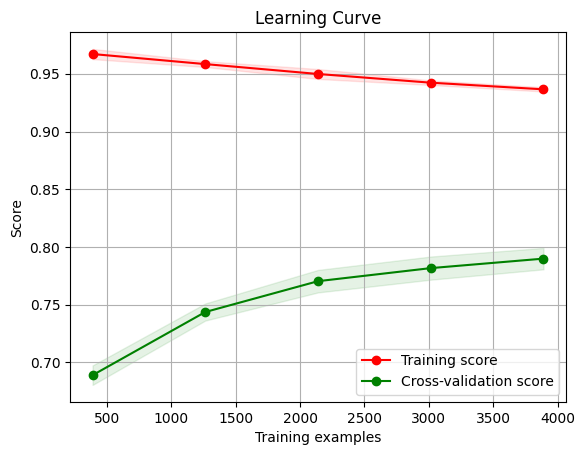

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit

# Function to plot learning curves
def plot_learning_curve(estimator, X_selected, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_selected, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    # Calculate mean and standard deviation of training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Split the data (X and y are your feature and target variables)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Plot learning curves
plot_learning_curve(rf_classifier, X_train, y_train, cv=cv, n_jobs=-1)

# Show the plot
plt.show()


In [ ]:
prob=rf_classifier.predict_proba(X_test)

In [ ]:
prob

array([[0.8818517 , 0.10041597, 0.01773233],
       [0.04374948, 0.94642187, 0.00982866],
       [0.34450316, 0.51106867, 0.14442817],
       ...,
       [0.61541606, 0.32994955, 0.05463439],
       [0.70442227, 0.26878041, 0.02679732],
       [0.90110117, 0.08727087, 0.01162797]])

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report


svm_model = SVC(

    C=2.0,
    kernel='rbf',
    gamma='scale',

)


svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

      Rank I       0.50      1.00      0.67       609
     Rank II       0.00      0.00      0.00       475
    Rank III       0.00      0.00      0.00       132

    accuracy                           0.50      1216
   macro avg       0.17      0.33      0.22      1216
weighted avg       0.25      0.50      0.33      1216

Confusion Matrix:
[[609   0   0]
 [475   0   0]
 [132   0   0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Ensure X_selected and y are already defined from your previous steps.


In [ ]:
# Add the target column to your feature set
data = X.copy()
# Convert bioactivity_class to numeric
data['bioactivity_class'] = y.map({'Rank I': 0, 'Rank II': 1, 'Rank III':2})


# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [ ]:
target = 'bioactivity_class'
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]


In [ ]:
# Predict on the test set
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Convert probabilities to binary predictions
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.7001499250374813
Confusion Matrix:
[[152  69   0]
 [ 38 315   0]
 [  0  93   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       221
           1       0.66      0.89      0.76       353
           2       0.00      0.00      0.00        93

    accuracy                           0.70       667
   macro avg       0.49      0.53      0.50       667
weighted avg       0.61      0.70      0.65       667



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [ ]:
test_df=pd.read_csv('hdac6_test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'hdac6_test.csv'

In [ ]:
test_df.head()

,Smiles
0,CNC(=O)c1csc(CCCN2CCC(=CC3CC3c3ccccc3)CC2)n1
1,COC(=O)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)n1
2,C=C(CO)c1csc(CCCN2CCN(CNC3CC3c3ccccc3)CC2)n1
3,C=C(CO)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)n1
4,C=C(NC)c1csc(CCCN2C=CC(CNC3CC3c3ccccc3)CC2)n1


In [ ]:
test_df.shape

(50, 1)

In [ ]:
descriptors = test_df['Smiles'].apply(calculate_descriptors) # calculating descriptors for all smiles in our original dataframe
desc = pd.DataFrame(descriptors.tolist(), columns=descriptor_names) # Adding these descriptors as lists to a new data frame, whose column heading is the descriptor name
results_df = pd.concat([test_df, desc], axis=1) # make a final data frame

[23:37:37] DEPRECATION WARNING: please use MorganGenerator
[23:37:37] DEPRECATION WARNING: please use MorganGenerator
[23:37:37] DEPRECATION WARNING: please use MorganGenerator
[23:37:37] DEPRECATION WARNING: please use MorganGenerator
[23:37:37] DEPRECATION WARNING: please use MorganGenerator
[23:37:37] DEPRECATION WARNING: please use MorganGenerator
[23:37:37] DEPRECATION WARNING: please use MorganGenerator
[23:37:37] DEPRECATION WARNING: please use MorganGenerator
[23:37:37] DEPRECATION WARNING: please use MorganGenerator
[23:37:37] DEPRECATION WARNING: please use MorganGenerator
[23:37:37] DEPRECATION WARNING: please use MorganGenerator
[23:37:37] DEPRECATION WARNING: please use MorganGenerator
[23:37:37] DEPRECATION WARNING: please use MorganGenerator
[23:37:37] DEPRECATION WARNING: please use MorganGenerator
[23:37:37] DEPRECATION WARNING: please use MorganGenerator
[23:37:37] DEPRECATION WARNING: please use MorganGenerator
[23:37:37] DEPRECATION WARNING: please use MorganGenerat

In [ ]:
results_df.shape

(50, 211)

In [ ]:
cleaned_final = results_df.dropna()
print(f"Original DataFrame shape: {results_df.shape}")
print(f"Cleaned DataFrame shape: {cleaned_final.shape}")

Original DataFrame shape: (50, 211)
Cleaned DataFrame shape: (50, 211)


In [ ]:
cleaned_final.head()

,Smiles,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CNC(=O)c1csc(CCCN2CCC(=CC3CC3c3ccccc3)CC2)n1,11.579838,11.579838,0.094432,-0.094432,0.712622,22.107143,395.572,366.340,395.203134,...,0,0,0,0,0,1,0,0,0,0
1,COC(=O)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)n1,11.476592,11.476592,0.343085,-0.343085,0.635197,22.517241,413.587,382.339,413.213698,...,0,0,0,0,0,1,0,0,0,0
2,C=C(CO)c1csc(CCCN2CCN(CNC3CC3c3ccccc3)CC2)n1,9.152247,9.152247,0.017890,-0.017890,0.628517,22.655172,412.603,380.347,412.229683,...,0,0,0,0,0,1,0,0,0,0
3,C=C(CO)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)n1,9.156192,9.156192,0.013261,-0.013261,0.621734,22.655172,411.615,378.351,411.234434,...,0,0,0,0,0,1,0,0,0,0
4,C=C(NC)c1csc(CCCN2C=CC(CNC3CC3c3ccccc3)CC2)n1,4.662067,4.662067,0.664213,0.664213,0.616658,23.206897,408.615,376.359,408.234768,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_robust=cleaned_final.copy()
numeric_columns = df_robust.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col != 'FDA_APPROVED'] # dont scale y!

scaler = RobustScaler()

# scale selected numeric columns
df_robust[numeric_columns] = scaler.fit_transform(df_robust[numeric_columns])

print(df_robust.head())

                                          Smiles  MaxAbsEStateIndex  \
0   CNC(=O)c1csc(CCCN2CCC(=CC3CC3c3ccccc3)CC2)n1           0.107908   
1   COC(=O)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)n1           0.061936   
2   C=C(CO)c1csc(CCCN2CCN(CNC3CC3c3ccccc3)CC2)n1          -0.973038   
3   C=C(CO)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)n1          -0.971282   
4  C=C(NC)c1csc(CCCN2C=CC(CNC3CC3c3ccccc3)CC2)n1          -2.972406   

   MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed       SPS  \
0        0.107908          -1.512732        0.664481  1.937476 -0.348380   
1        0.061936           0.306982        0.167309  1.392712 -0.238261   
2       -0.973038          -2.072888        0.817524  1.345708 -0.201224   
3       -0.971282          -2.106769        0.826781  1.297981 -0.201224   
4       -2.972406           2.657098        2.181366  1.262272 -0.053075   

      MolWt  HeavyAtomMolWt  ExactMolWt  ...  fr_sulfide  fr_sulfonamd  \
0 -5.669441   -2.673630e+00   -5.654972  .

In [ ]:
df_robust.shape

(50, 211)

In [ ]:

test_df=df_robust.copy()
test_df=test_df.drop(columns='Smiles')

In [ ]:
test_df.shape

(50, 210)

In [ ]:
test_pred=rf_classifier.predict(test_df)
print(test_pred)
test_pred=pd.DataFrame(test_pred)


# Rename the columns of test_pred
test_pred.columns = ['Rank']  # Rename the first column to 'Rank'

# Concatenate the DataFrames
display_df = pd.concat([df_robust['Smiles'], test_pred], axis=1)

display_df=pd.concat([df_robust['Smiles'],test_pred],axis=1)
display_df=pd.concat([display_df,test_pred_proba],axis=1)



['Rank II' 'Rank II' 'Rank II' 'Rank II' 'Rank II' 'Rank II' 'Rank II'
 'Rank II' 'Rank II' 'Rank II' 'Rank II' 'Rank II' 'Rank II' 'Rank II'
 'Rank I' 'Rank II' 'Rank II' 'Rank II' 'Rank I' 'Rank II' 'Rank II'
 'Rank II' 'Rank II' 'Rank II' 'Rank II' 'Rank I' 'Rank I' 'Rank I'
 'Rank I' 'Rank II' 'Rank II' 'Rank I' 'Rank II' 'Rank II' 'Rank II'
 'Rank II' 'Rank I' 'Rank I' 'Rank I' 'Rank II' 'Rank II' 'Rank I'
 'Rank II' 'Rank II' 'Rank I' 'Rank I' 'Rank I' 'Rank II' 'Rank I'
 'Rank II']


In [ ]:
display_df

,Smiles,Rank,0,1,2
0,CNC(=O)c1csc(CCCN2CCC(=CC3CC3c3ccccc3)CC2)n1,Rank II,0.083259,0.570785,0.345956
1,COC(=O)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)n1,Rank II,0.142722,0.559504,0.297774
2,C=C(CO)c1csc(CCCN2CCN(CNC3CC3c3ccccc3)CC2)n1,Rank II,0.125350,0.552560,0.322091
3,C=C(CO)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)n1,Rank II,0.100691,0.607093,0.292216
4,C=C(NC)c1csc(CCCN2C=CC(CNC3CC3c3ccccc3)CC2)n1,Rank II,0.143877,0.584285,0.271838
5,O=C(CO)C1CSC(CCCC2CCC(CNC3CC3c3ccccc3)CC2)=N1,Rank II,0.144821,0.531909,0.323270
6,O=C(CO)c1csc(CCCN2C=CC(CCC3CC3c3ccccc3)CC2)n1,Rank II,0.094446,0.561334,0.344219
7,OCC(CO)c1nsc(CCCN2CCC(CCC3CC3c3ccccc3)CC2)n1,Rank II,0.183796,0.498503,0.317701
8,O=C(CO)c1csc(CCCC2CCC(CNC3CC3c3ccccc3)CC2)n1,Rank II,0.114172,0.493761,0.392067
9,C=C(NC)c1csc(CCCN2CCC(CCC3CC3c3ccccc3)CC2)n1,Rank II,0.147076,0.606494,0.246430


In [ ]:
# Filter for Rank I compounds
filtered_df = display_df[display_df['Rank'] == "Rank I"]
filtered_df
# Sort by the first column (labeled `0`) in descending order
sorted_df = filtered_df.sort_values(by=0, ascending=False)

# Display the resulting DataFrame
sorted_df.head()

,Smiles,Rank,0,1,2
36,O=C(NO)c1csc(CCCC2CCC(CNC3CC3c3ccccc3)CN2)n1,Rank I,0.666693,0.299636,0.033671
31,O=C(NO)c1csc(CCCC2CCC(CNC3CC3c3ccccc3)CC2)n1,Rank I,0.665287,0.295293,0.039421
26,O=C(NO)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)c1,Rank I,0.591695,0.321363,0.086942
44,O=C(NO)c1csc(CCCC2=CCC(CNC3CC3c3ccccc3)CC2)n1,Rank I,0.566509,0.352086,0.081405
48,O=C(NO)c1csc(CCCNCCCN2CCC(CCCc3ccccc3)NC2)c1,Rank I,0.550039,0.384164,0.065797


In [ ]:
# Get the predicted probabilities for each class
test_pred_proba = rf_classifier.predict_proba(test_df)

# Get the predicted classes
test_pred = rf_classifier.predict(test_df)

test_pred_proba=pd.DataFrame(test_pred_proba)


In [ ]:
report_df= pd.concat([test_df, test_pred, test_pred_proba], axis=1)



TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [ ]:
# Assuming 'Rank I' corresponds to class label '1', adjust if needed
rank_I_class_label = 'Rank I'

# Iterate over predictions and probabilities
for i in range(len(test_pred)):
    if test_pred[i] == rank_I_class_label:
        smiles_entry = test_df.iloc[i]['Smiles']  # Adjust 'Smiles' if column name differs
        probability = test_pred_proba[i][rank_I_class_label]  # Probability of being 'Rank I'
        print(f"SMILES: {smiles_entry}, Probability of Rank I: {probability}")


KeyError: 'Smiles'